# Product Sales Project

By: Abraham Saenz Sigala

In [1]:
# Import data and libraries

import os 
os.chdir(r'C:\Users\abrah\OneDrive\Documents\Data Camp\Data Analyst Certificate\Practical Exam')

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('product_sales.csv')

Data Exploration

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [3]:
df.columns

Index(['week', 'sales_method', 'customer_id', 'nb_sold', 'revenue',
       'years_as_customer', 'nb_site_visits', 'state'],
      dtype='object')

In [4]:
df.shape

(15000, 8)

In [5]:
df

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey


In [6]:
df.isna().value_counts()

week   sales_method  customer_id  nb_sold  revenue  years_as_customer  nb_site_visits  state
False  False         False        False    False    False              False           False    13926
                                           True     False              False           False     1074
Name: count, dtype: int64

In [7]:
df['sales_method'].value_counts() # 5 sales method instead of 3. Inconsitency.

sales_method
Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: count, dtype: int64

In [8]:
df['revenue'].isna().value_counts() # 1074 missing values in revenue column. 
# Fill N/A specific grouped average, or leave missing.

revenue
False    13926
True      1074
Name: count, dtype: int64

Data Cleaning

In [39]:
# Make sales_method column consistent
df.sales_method.value_counts() # em + call and email should be replaced/renamed appropriately.


sales_method
Email           7465
Call            4961
Email + Call    2572
Name: count, dtype: int64

In [10]:
# Standardizing sales_method values for consistency in analysis
#df['sales_method'] = df['sales_method'].str.replace('em + call', 'Email + Call')
#df['sales_method'] = df['sales_method'].str.replace('email', 'Email')

# Alternatively we can use a dictionary and rename them. 
sales_method_mapping = { 'email':'Email', 'em + call': 'Email + Call'}
df['sales_method'] = df['sales_method'].replace(sales_method_mapping)


In [11]:
# Drop year_as_customer values that exceed 39 years. 2023 - 1984 = 39 years
df = df[df['years_as_customer'] <= 39]

In [12]:
# Fill revenue NaN values with the grouped by average of the specific nb_sold and sales_method
group_means = df.groupby(['nb_sold', 'sales_method'])['revenue'].transform('mean')

# Fill NaN values with the group specific mean
df['revenue'] = df['revenue'].fillna(group_means)

df['revenue'] = df['revenue'].round(2)

C:\Users\abrah\AppData\Local\Temp\ipykernel_15536\1476124580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['revenue'] = df['revenue'].fillna(group_means)
C:\Users\abrah\AppData\Local\Temp\ipykernel_15536\1476124580.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['revenue'] = df['revenue'].round(2)


Data Analysis

In [13]:
# 1. How many customers were there for each approach?
method_counts = df.groupby('sales_method').size().reset_index(name = 'customers').sort_values(by = 'customers', ascending = False)
print(method_counts)

   sales_method  customers
1         Email       7465
0          Call       4961
2  Email + Call       2572


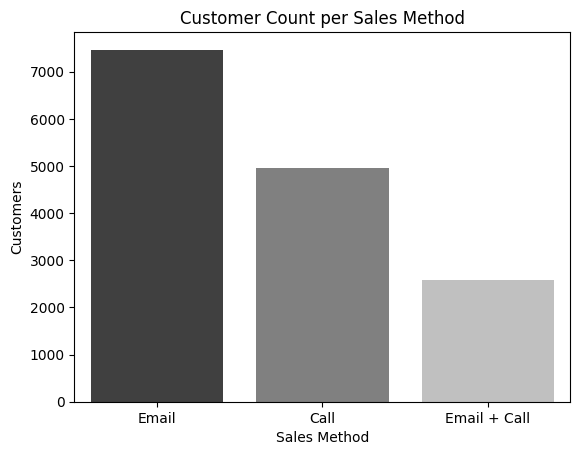

In [14]:
# Visualization: Bar Plot
custom_palette = sns.color_palette('gray', n_colors=3)

sns.barplot(data = method_counts, x = 'sales_method', y = 'customers', palette = custom_palette, hue = 'sales_method' )

plt.ylabel('Customers')
plt.xlabel('Sales Method')
plt.title('Customer Count per Sales Method')

plt.show()

We have three primary sales methods which are Email, Call, and a combined Email + Call approach. Currently, we engage the largest number of customers through Email, followed by Calls, while the combined Email + Call strategy receives comparatively less focus. Its also important to note the Call only method takes around 30 min on average. The Call in Email + Call combination takes around 10 minutes on average. We also are only working with 6 weeks worth of data as that was provided.

In [15]:
# 2. What does the spread of the revenue look like overall? 

# Avg Revenue 
avg_revenue = df['revenue'].mean()
print(f'Average Revenue Overall: ${avg_revenue.round(2)}')

Average Revenue Overall: $95.72


In [16]:
# Total Outliers for Overall Revenue
Q1 = df['revenue'].quantile(.25)
Q3 = df['revenue'].quantile(.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['revenue'] > upper) | (df['revenue'] < lower)]

print(f'Total Outliers: {len(outliers)}')

Total Outliers: 617


In [17]:
# IQR Range 
print('IQR Range:')
print(f'Q3: ${Q3}')
print(f'Q1: ${Q1}')

IQR Range:
Q3: $108.63
Q1: $52.76


In [18]:
# Filter out the outliers
filtered_df = df[(df['revenue'] <= upper) & (df['revenue'] >= lower)]

# Find the max and min values excluding outliers
max_value_excluding_outliers = filtered_df['revenue'].max()
min_value_excluding_outliers = filtered_df['revenue'].min()

print(f'Max Value (Excluding Outliers): ${max_value_excluding_outliers}')
print(f'Min Value (Excluding Outliers): ${min_value_excluding_outliers}')

Max Value (Excluding Outliers): $192.39
Min Value (Excluding Outliers): $32.54


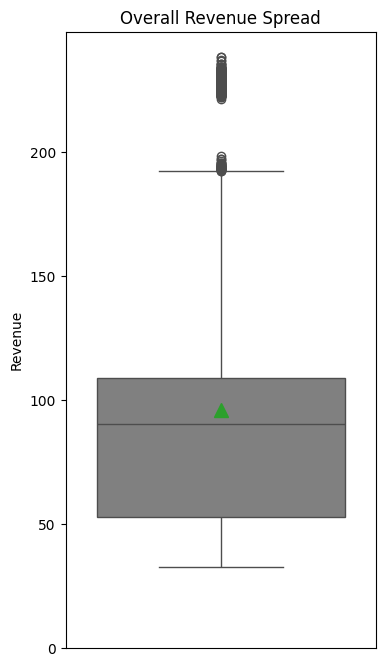

In [19]:
# Visualization 2.2: Box Plot

plt.figure(figsize = (4,8))
sns.boxplot(data = df, y = 'revenue', showmeans = True, meanprops={"markersize":10}, color = 'gray')

plt.xticks([])
plt.ylabel('Revenue')
plt.title('Overall Revenue Spread')

plt.ylim(bottom=0)

plt.show()

Our overall revenue typically ranges from $52 to $108, with $32 as the lowest and $192 as the highest. On average, we make $95. However, 617 transactions are unusually high compared to the rest

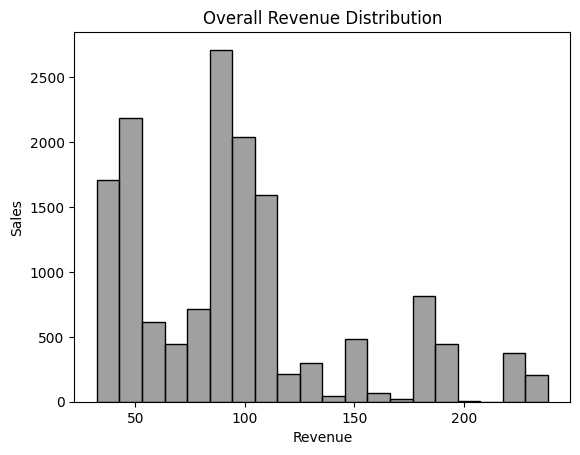

In [20]:
sns.histplot(data = df, x = 'revenue', bins = 20, color = 'gray')

plt.xlabel('Revenue')
plt.ylabel('Sales')
plt.title('Overall Revenue Distribution')

plt.show()

This histogram provides a view of our overall revenue distribution. The highest number of products sold falls in the $90 range. We also see that a significant portion of our sales falls within the lower revenue range. We can also see a lack of sales in the higher revenue range indicating a potential area of growth.

In [21]:
# 2.3 Revenue spread by sales method
# Sales method and revenue df
rev_spread_method = df[['sales_method', 'revenue']].sort_values(by = 'revenue', ascending = False)

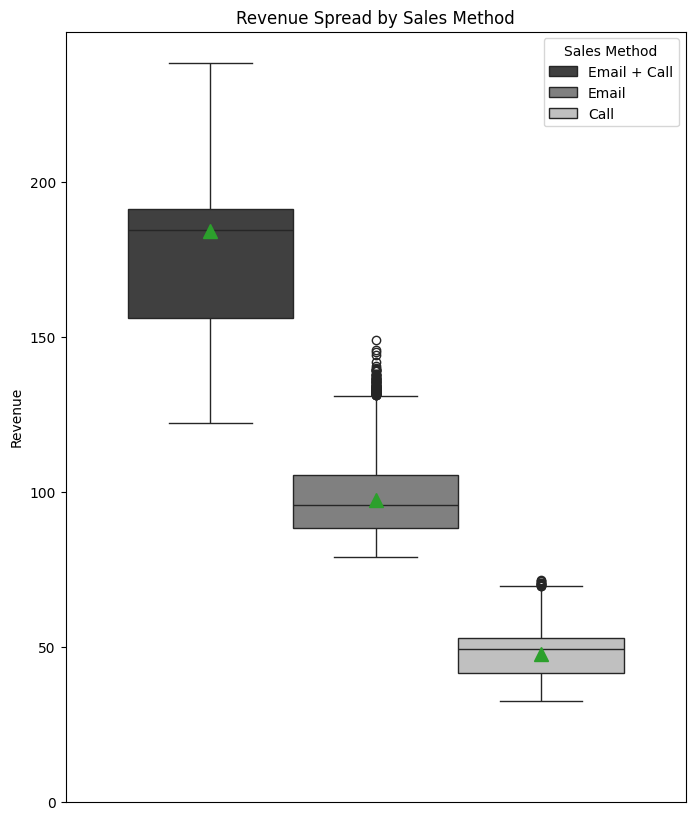

In [22]:
# 2.3 Visualization: Box Plot

plt.figure(figsize = (8,10))
sns.boxplot(data = rev_spread_method, y = 'revenue', showmeans = True, meanprops={"markersize":10}, hue = 'sales_method', palette = 'gray')

plt.xticks([])
plt.ylabel('Revenue')
plt.title('Revenue Spread by Sales Method')
plt.legend(title = 'Sales Method')

plt.ylim(bottom=0)

plt.show()

Here we see how our revenue spread varies depending on the sales method. Email + Call brings in the most money, between $160 and $190 (Avg: $184). Emails alone make less, around $90 to $110 (Avg: $97). Calls bring in the least, at around just $40 to $50 (Avg: $48). 

In [23]:
# Average revenue for each sales method
avg_revenue_per_method = rev_spread_method.groupby('sales_method').mean().round(2)
avg_revenue_per_method

,revenue
sales_method,
Call,47.64
Email,97.19
Email + Call,184.23


In [24]:
# 3. What sales method brings in the highest revenue
most_rev = rev_spread_method.groupby('sales_method')['revenue'].sum().reset_index()

In [25]:
most_rev = most_rev.sort_values(by = 'revenue', ascending = False)
most_rev

,sales_method,revenue
1,Email,725486.44
2,Email + Call,473827.98
0,Call,236346.89


C:\Users\abrah\AppData\Local\Temp\ipykernel_15536\616230740.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = most_rev, y = 'revenue', x = 'sales_method', palette = 'gray')


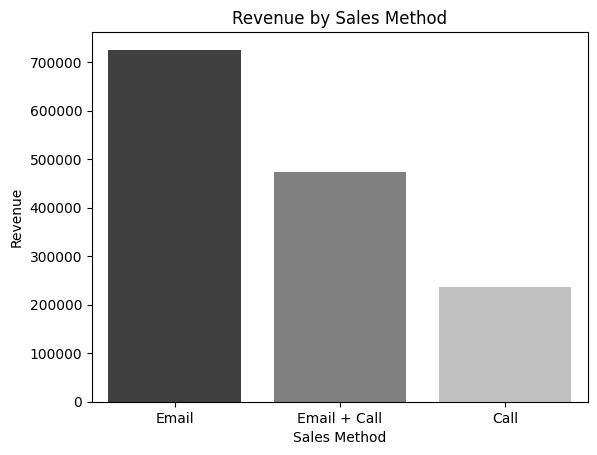

In [26]:
# Visualization: Bar PLot

sns.barplot(data = most_rev, y = 'revenue', x = 'sales_method', palette = 'gray')

plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.title('Revenue by Sales Method')

plt.show()

Although not necessarily a question that was asked, I think its important to see the amount of revenue each method brought in. The Email sales method brings in the most revenue, over $700,000. Email + Call comes second, generating about $480,000. Finally, Call brings in the least, around $230,000, which is roughly a third of what Email only makes and less than half of what the Email + Call combination brings in despite it being the second most used method.

In [ ]:
# 4. Was there any difference in revenue over time for each of the methods? 

In [28]:
rev_overtime = df[['sales_method', 'revenue', 'years_as_customer', 'week']]
rev_overtime

,sales_method,revenue,years_as_customer,week
0,Email,99.76,0,2
1,Email + Call,225.47,1,6
2,Call,52.55,6,5
3,Email,108.72,3,4
4,Email,90.49,0,3
...,...,...,...,...
14995,Call,50.82,0,4
14996,Call,52.33,1,5
14997,Call,34.87,4,1
14998,Call,64.90,2,6


In [29]:
sales_over_6 = rev_overtime.groupby(['week', 'sales_method'])['revenue'].sum().unstack()
sales_over_6

sales_method,Call,Email,Email + Call
week,,,
1,26796.75,246380.59,19080.77
2,35098.45,148704.11,30801.16
3,37662.44,106807.34,54039.29
4,51662.30,116957.75,89660.24
5,55484.67,80846.73,147489.41
6,29642.28,25789.92,132757.11


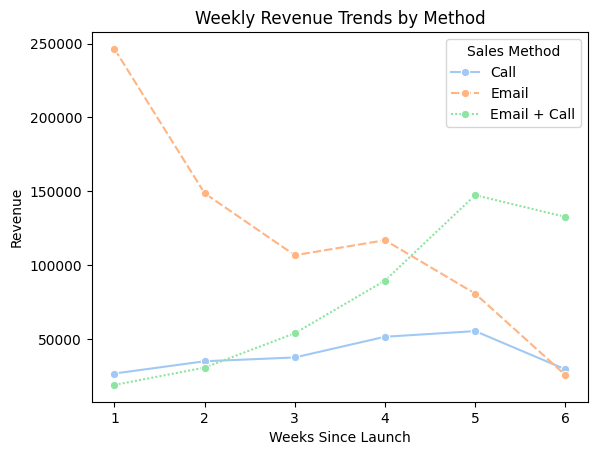

In [31]:
sales_over_6 = rev_overtime.groupby(['week', 'sales_method'])['revenue'].sum().unstack()

# Plotting the data
sns.lineplot(data = sales_over_6, marker='o', palette = 'pastel')

plt.title('Weekly Revenue Trends by Method')
plt.xlabel('Weeks Since Launch')
plt.ylabel('Revenue')
plt.legend(title = 'Sales Method')

plt.show()

This line plot shows that Email sales method drops significantly at 85.7%, but its effective in bringing the most revenue overall due to how much we use it. Email + Call takes a little time to get going but passes the Call only sales method shortly after week 2. It is effective in bringing in the highest revenue per sale and the second highest revenue overall despite it being the least used sales method. Call significantly underperforms, producing the least revenue almost every week and overall.